In [2]:
#kernel = use CMIP6 AWS
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
from scipy import stats
import matplotlib
import matplotlib.animation as animation
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import warnings
import matplotlib.path as mpath
import intake
import pandas as pd
import s3fs
import proplot as pplt
from numba import jit
import os
warnings.filterwarnings("ignore")

In [36]:
#possible regions of interest for creating time series
#lab sea: 55N to 65N, 285E to 315E (-75. to -45.)
#irm + iceland: 55N to 65N, 315E to 345E (-45. to -15.)
#nordic seas: 65N to 80N, 340E to 15W (-20. to 15.)
####Change these here
latmin = 55.
latmax = 65.
lonmin = -75.
lonmax = -45.
RegionName = "LabSea"
mydir = "/net/aeolus/aura/hansingh/CMIP6_OHUdata/" #location of input datasets
outdir = "/net/aeolus/aura/hansingh/CMIP6_OHUdata/Dataset_07102022/"
####

#setup
deg2rad = np.pi/180.
myvars = ["tas","psl","hfss","hfls"]
nvar = len(myvars)
myDataset = xr.open_dataset(mydir+"CMIP6."+myvars[0]+".Control.month.06092022.nc")
mylat = myDataset.lat
coslat = np.array(np.cos(deg2rad*mylat))
mylon = myDataset.lon
mymodels = myDataset.models
mytime = myDataset.t
latminind = int(np.abs(latmin-mylat).argmin())
latmaxind = int(np.abs(latmax-mylat).argmin())
lonminind = int(np.abs(lonmin-mylon).argmin())
lonmaxind = int(np.abs(lonmax-mylon).argmin())
nmodels, ntime, nlat, nlon = np.shape(myDataset[myvars[0]])
#break

for ivar in range(0,nvar):
    print("Working on "+myvars[ivar])
    #grab dataset
    myDataset = xr.open_dataset(mydir+"CMIP6."+myvars[ivar]+".Control.month.06092022.nc")
    #grab region of interest and create time series
    mydata0 = np.array(myDataset[myvars[ivar]]) 
    mydata = np.where(mydata0==0., np.nan, mydata0) #turn 0 to nan
    mydata_zm = np.nanmean(mydata[:,:,:,lonminind:lonmaxind],axis=3)
    mydata_ts = np.nansum(mydata_zm[:,:,latminind:latmaxind]*coslat[latminind:latmaxind],axis=2)/np.sum(coslat[latminind:latmaxind])
    #make new dataset
    ds = xr.Dataset({myvars[ivar]:(("models","t"),mydata_ts)},
                   coords={
                       "models":mymodels,
                       "t": mytime, #t = time!
                          },)
    #write to netcdf
    print("Writing "+myvars[ivar]+" to netcdf")
    ds.to_netcdf(outdir+"CMIP6."+myvars[ivar]+"."+RegionName+".Control.month.072022.nc")

Working on tas
Writing tas to netcdf
Working on psl
Writing psl to netcdf
Working on hfss
Writing hfss to netcdf
Working on hfls
Writing hfls to netcdf


(469, 600, 46, 111)
(469, 600, 46, 111)
(469, 600, 46, 111)
(469, 600, 46, 111)
(469, 600, 46, 111)
(469, 600, 46, 111)
(469, 600, 46, 111)
(469, 600, 46, 111)
(469, 600, 46, 111)
(469, 600, 46, 111)
(469, 600, 46, 111)
(469, 600, 46, 111)


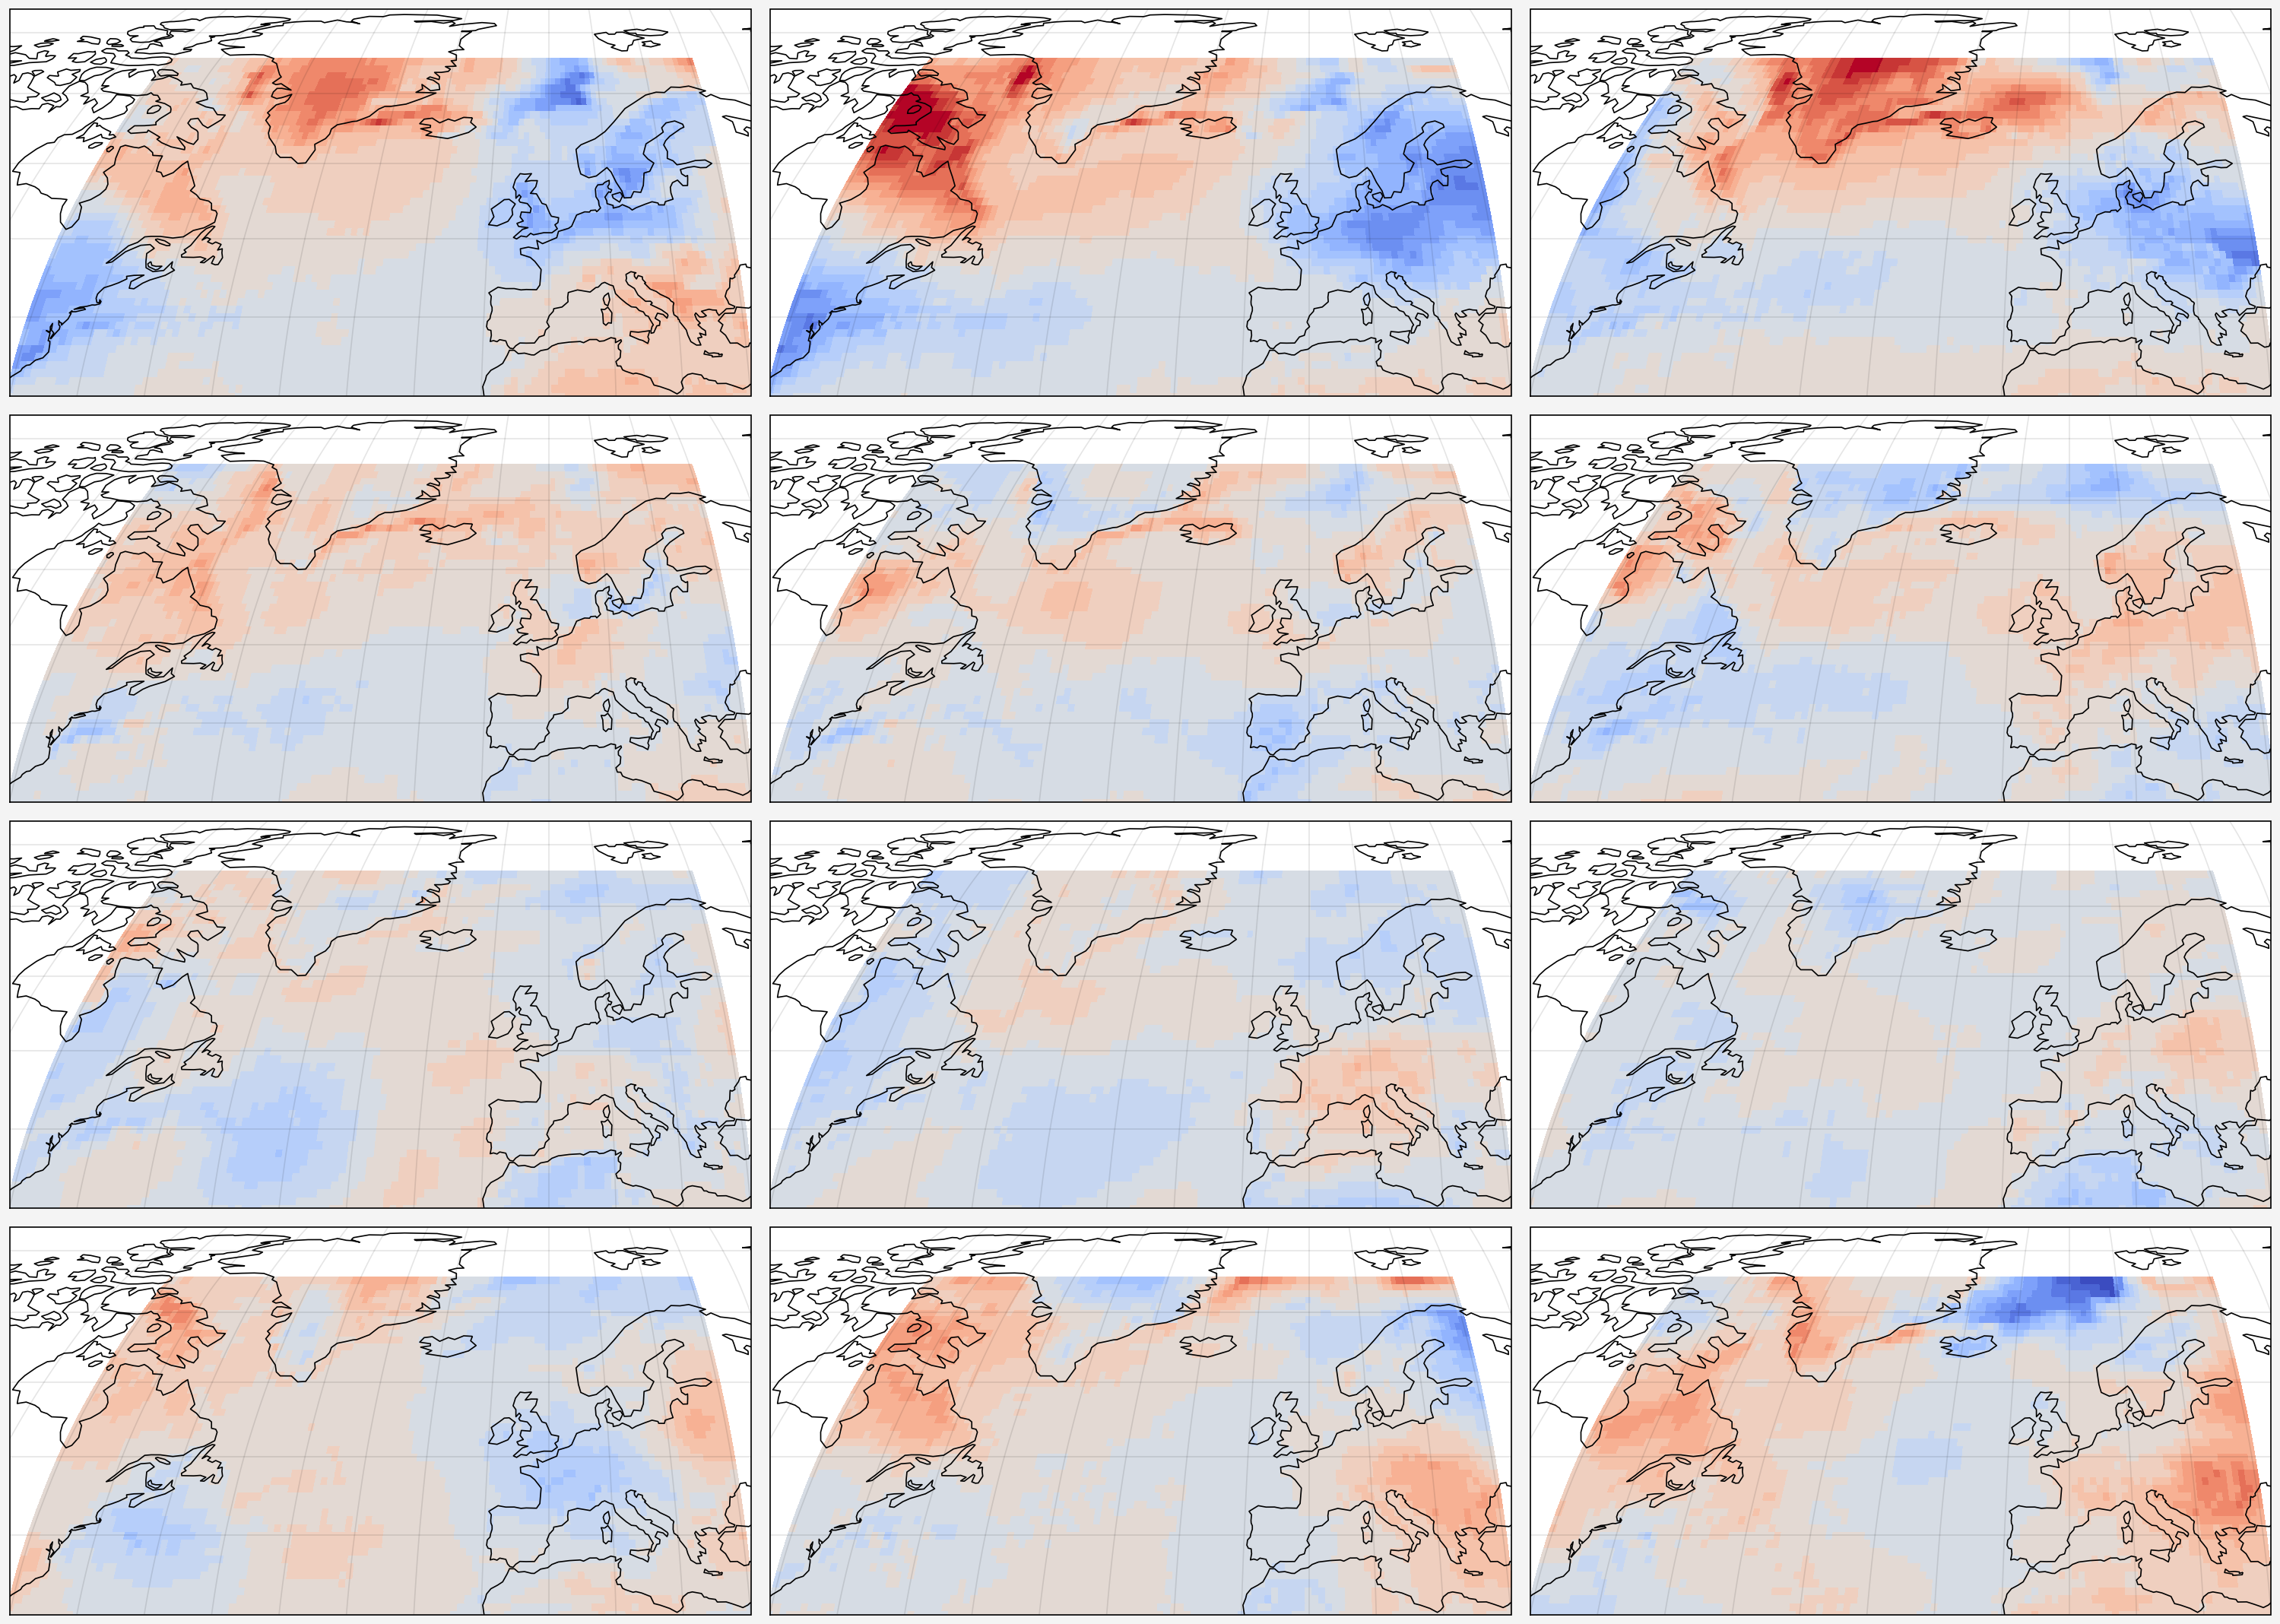

In [34]:
myDataset = xr.open_dataset(mydir+"CMIP6."+myvars[0]+".Control.month.06092022.nc")
mytas = myDataset.tas
fig, axs = pplt.subplots(ncols=3, nrows=4, figwidth=15, proj="robin")
fig.format(coast=True, latlines=10., lonlines=10., lonlim=(-80, 30), latlim=(30, 85))
for i in range(0,12):
    print(np.shape(mytas))
    axs[i].pcolormesh(mylon, mylat, mytas[150,i,:,:],levels=np.linspace(-10.,10.,21),cmap="coolwarm")
    #axs[i].format(title=mytitles[i], fontsize=14)